<br><br><br>

### HydroRIVERS (Siberia)
- https://www.hydrosheds.org/products/hydrorivers

<br><br><br>

In [1]:
# File and Data Manipulation
import os                       # interacting with the operating system
import glob                     # retrieving files/pathnames matching a specified pattern
from collections import Counter # counting hashable objects
import shutil                   # high-level file operations
import pickle                   # serializing and de-serializing Python object structures

# Data Analysis
import numpy as np              # numerical operations
import pandas as pd             # data manipulation and analysis
import seaborn as sns           # Statistics and Quick Visualizations

# Geospatial Data Handling
import geopandas as gpd         # working with geospatial data

# Data Visualization
import matplotlib.pyplot as plt       # creating static, interactive, and animated visualizations
plt.style.use("default")              # Set the default style matplotlib plots
from matplotlib.ticker import MaxNLocator     # control the maximum number of ticks on plots
from matplotlib.ticker import MultipleLocator # control tick intervals on plots
import matplotlib.ticker as mticker           # advanced tick formatting and placement
import matplotlib.colors as mcolors   # colors for legend
import matplotlib.patches as mpatches # drawing patches (shapes) for legend
from matplotlib.lines import Line2D   # creating line elements in plots, commonly used in legends

# Suppress Warnings
import warnings                 # handling warnings
warnings.filterwarnings("ignore") # Suppress all warnings (use with caution!)

##### Link Notebook to the Directory of Interest

In [2]:
# Link Notebook to the Directory of Interest
os.chdir('J:\Chomiak_Python\Chomiak_Notebooks\Maps_Siberia_Data')

##### Import Main Shapefile

In [3]:
# Yenisey Watershed
AGRO_Watershed = gpd.read_file('ArcticGRO_Yenisei_watershed')
# Lakes
gpd_lakes = gpd.read_file('GeoPandas_Yenisei_lakes')

#### Describe the Folder of Interest

In [4]:
def summarize_folder_contents(folder_path):
    # List all files in the folder using glob
    all_files = glob.glob(os.path.join(folder_path, "*"))

    # Get just the filenames (without full path)
    file_names = [os.path.basename(file) for file in all_files]

    # Get the sizes of the files in megabytes
    file_sizes_mb = [os.path.getsize(file) / (1024 * 1024) for file in all_files]

    # Pair filenames with their sizes and sort them by size from largest to smallest
    file_info = sorted(list(zip(file_names, file_sizes_mb)), key=lambda x: x[1], reverse=True)

    # Count different types of files
    file_types = [os.path.splitext(name)[1].lower() for name in file_names]
    file_type_counts = Counter(file_types)

    # Checking for duplicates
    duplicate_files = [file for file in file_names if file_names.count(file) > 1]

    # Print summary first
    print("Summary:")
    print()
    print(f"Total number of files: {len(file_names)}")
    print(f"Total size: {sum(file_sizes_mb):.2f} MB")
    print()
    print("File type counts:")
    print()
    for file_type, count in file_type_counts.items():
        print(f"  {file_type if file_type else 'No extension'}: {count}")
    if duplicate_files:
        print(f"Duplicate files: {set(duplicate_files)}")
    else:
        print()
        print("No duplicate files found.")
    print("\nFile details:")

    # Then print individual file details
    for name, size in file_info:
        print(f"{name}: {size:.2f} MB")

In [5]:
# Describe ALL files in a Folder
folder_path = 'Chomiak_Data_Hydrosheds\Data_Siberia_Hydrosheds\Siberia_HydroRIVERS_v10'
summarize_folder_contents(folder_path)

Summary:

Total number of files: 6
Total size: 178.22 MB

File type counts:

  .dbf: 1
  .prj: 1
  .sbn: 1
  .sbx: 1
  .shp: 1
  .shx: 1

No duplicate files found.

File details:
HydroRIVERS_v10_si.shp: 100.52 MB
HydroRIVERS_v10_si.dbf: 66.58 MB
HydroRIVERS_v10_si.sbn: 5.81 MB
HydroRIVERS_v10_si.shx: 5.17 MB
HydroRIVERS_v10_si.sbx: 0.15 MB
HydroRIVERS_v10_si.prj: 0.00 MB


#### Import and Describe the Data

In [6]:
# HydroRIVERS
Siberia_HydroRIVERS = gpd.read_file(folder_path)
print('HydroRIVERS')
print(Siberia_HydroRIVERS.shape)
print(Siberia_HydroRIVERS.crs)
print(Siberia_HydroRIVERS.columns)
print(Siberia_HydroRIVERS.dtypes)

HydroRIVERS
(677765, 15)
epsg:4326
Index(['HYRIV_ID', 'NEXT_DOWN', 'MAIN_RIV', 'LENGTH_KM', 'DIST_DN_KM',
       'DIST_UP_KM', 'CATCH_SKM', 'UPLAND_SKM', 'ENDORHEIC', 'DIS_AV_CMS',
       'ORD_STRA', 'ORD_CLAS', 'ORD_FLOW', 'HYBAS_L12', 'geometry'],
      dtype='object')
HYRIV_ID         int64
NEXT_DOWN        int64
MAIN_RIV         int64
LENGTH_KM      float64
DIST_DN_KM     float64
DIST_UP_KM     float64
CATCH_SKM      float64
UPLAND_SKM     float64
ENDORHEIC        int64
DIS_AV_CMS     float64
ORD_STRA         int64
ORD_CLAS         int64
ORD_FLOW         int64
HYBAS_L12        int64
geometry      geometry
dtype: object


### Clip the Data to the Area of Interest

In [7]:
# Clip Shapefile to the Area of Interest
#Yenisey_HydroRIVERS = gpd.clip(Siberia_HydroRIVERS, AGRO_Watershed)

# Save File
#Yenisey_HydroRIVERS.to_file('Yenisey_HydroRIVERS')

# Open File
Yenisey_HydroRIVERS = gpd.read_file('Yenisey_HydroRIVERS')

(46.37338787934154, 71.62704695372541)

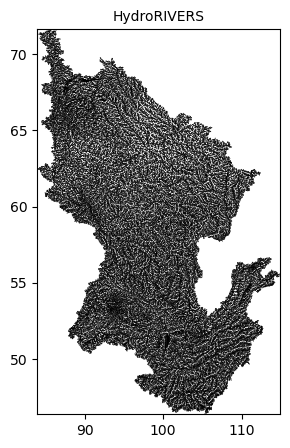

In [8]:
# Plotting
fig, ax = plt.subplots(figsize=(5, 5))
Yenisey_HydroRIVERS.plot(ax=ax, cmap='tab20c', edgecolor='black', lw=0.5)
ax.set_title('HydroRIVERS', fontsize=10)
# Setting the plot limits
xmin, ymin, xmax, ymax = AGRO_Watershed.total_bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

<br><br>

### More about the HydroRIVERS attributes...

- from Documentation 
- https://www.hydrosheds.org/products/hydrorivers

<br>

##### ORD_CLAS
> Indicator of river order following the classical ordering system. Can be used to identify ‘backbone’ rivers, i.e., the main stem of a river from source to sink.
>> order 1 @ the main stem river from sink to source; <br>
>> order 2 @ all tributaries that flow into a 1st order river; <br>
>> order 3 @ all tributaries that flow into a 2nd order river; etc. <br>

##### ORD_STRA
> Indicator of river order following the Strahler ordering system: 
>> order 1 @ headwater streams; <br>
>> order 2 @ when two 1st order streams meet <br>
>> order 3 @ when two 2nd order rivers meet <br>

##### ORD_FLOW
> Indicator of river order using long-term average discharge (1971-2000), or river flow, to distinguish logarithmic size classes: 
>> order 1 @ long-term average discharge ≥ 100,000 m3/s; <br>
>> order 2 @ long-term average discharge ≥ 10,000 m3/s and < 100,000 m3/s; … <br>
>> order 3 @ long-term average discharge ≥ 1000 m3/s and < 10,000 m3/s; … <br>
>> order 4 @ long-term average discharge ≥ 100 m3/s and < 1000 m3/s; … <br>
>> order 5 @ long-term average discharge ≥ 10 m3/s and < 100 m3/s; … <br>
>> order 6 @ long-term average discharge ≥ 1 m3/s and < 10 m3/s; … <br>
>> order 7 @ long-term average discharge ≥ 0.1 m3/s and < 1 m3/s; … <br>
>> order 8 @ long-term average discharge ≥ 0.01 m3/s and < 0.1 m3/s; … <br>
>> order 9 @ long-term average discharge ≥ 0.001 m3/s and < 0.01 m3/s; and <br>
>> order 10 @ long-term average discharge < 0.001 m3/s (i.e., 0 in the provided data due to rounding to 3 digits).<br>

##### DIS_AV_CMS
> Average long-term discharge estimate for river reach, in cubic meters per second. See section 2.2 for more information.
>> For the delineation of the river network presented in HydroRIVERS, a discharge threshold was used to define the initiation points of all headwater streams. For this purpose, estimates of long-term (1971-2000) average discharge were derived through a geospatial downscaling procedure (Lehner and Grill 2013) from the 0.5 degree resolution runoff and discharge layers of the global WaterGAP model (Döll et al. 2003; version 2.2 as of 2014), a well-documented and validated integrated water balance model. After downscaling, the global total river flow into all oceans matched the original flow as modeled in WaterGAP within an error margin of 0.13%, indicating no significant distortion of large-scale totals due to the downscaling process.


##### LENGTH_KM
> Length of the river reach segment, in kilometers.

<br><br>

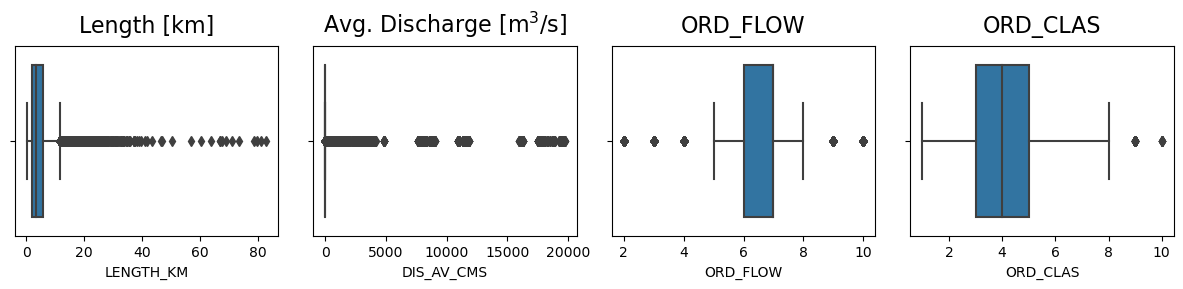

In [9]:
# Set figure and axes
fig, ax = plt.subplots(1,4,figsize =(12,3))
# Box plot
sns.boxplot(x=Yenisey_HydroRIVERS['LENGTH_KM'], ax=ax[0])
sns.boxplot(x=Yenisey_HydroRIVERS['DIS_AV_CMS'], ax=ax[1])
sns.boxplot(x=Yenisey_HydroRIVERS['ORD_FLOW'], ax=ax[2])
sns.boxplot(x=Yenisey_HydroRIVERS['ORD_CLAS'], ax=ax[3])
# Titles
ax[0].set_title('Length [km]', fontsize=16, pad=10)
ax[1].set_title('Avg. Discharge [m$^3$/s]', fontsize=16, pad=10)
ax[2].set_title('ORD_FLOW', fontsize=16, pad=10)
ax[3].set_title('ORD_CLAS', fontsize=16, pad=10)
fig.tight_layout()

In [10]:
def plot_columns_single_row(df, columns, bins=51, alpha=0.7, sharey=True):  
    """
    Plots histograms for specified columns in a DataFrame, all in a single row.

    :df: DataFrame containing the data.
    :columns: List of column names to plot.
    :bins: Number of bins for the histogram.
    :alpha: Alpha blending value for the histogram.
    """
    num_cols = len(columns)
    fig, ax = plt.subplots(1, num_cols, figsize=(9, 3), sharey=sharey)

    ax[0].set_ylabel('Frequency', labelpad=20, fontsize=12)
    ax[0].yaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=12)
    
    for i, col in enumerate(columns):
        data = df[col]
        mean = data.mean()
        std = data.std()
        
        # Histogram plot
        counts, bins_array, patches = ax[i].hist(data, bins, edgecolor='black', color='blue', alpha=alpha)

        # Find the bin with the maximum frequency
        max_count = counts.max()
        max_bin_index = counts.argmax()
        max_bin_value = bins_array[max_bin_index]

        # Add vertical and horizontal lines
        ax[i].axhline(y=max_count, color='r', linestyle='dashed', lw=1)
        ax[i].axvline(x=max_bin_value, color='r', linestyle='dashed', lw=1)

        ax[i].set_title(f'{col}', fontsize=16)
        ax[i].text(0.925, 0.95, f'μ: {mean:.1f}', fontsize=12, ha='right', va='top', 
                   transform=ax[i].transAxes)
        ax[i].text(0.925, 0.88, f'σ: {std:.1f}', fontsize=12, ha='right', va='top', 
                   transform=ax[i].transAxes)
        ax[i].xaxis.set_major_locator(MaxNLocator(6))
        ax[i].xaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=10)

    plt.tight_layout(pad=0.5)
    plt.show()

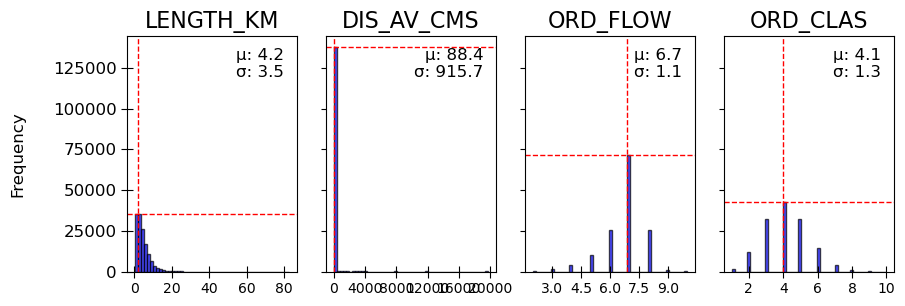

In [11]:
plot_columns_single_row(Yenisey_HydroRIVERS, ['LENGTH_KM', 'DIS_AV_CMS', 'ORD_FLOW', 'ORD_CLAS'])

##### ORD_FLOW

In [12]:
# Look at Unique Entries
nunique_ORD_FLOW = Yenisey_HydroRIVERS.ORD_FLOW.nunique(), 
unique_ORD_FLOW = Yenisey_HydroRIVERS.ORD_FLOW.unique()
print(nunique_ORD_FLOW)
print(unique_ORD_FLOW)

(9,)
[ 7  6  5  4  2  8  3  9 10]



Mean: 7.0
Range: (2 - 10)



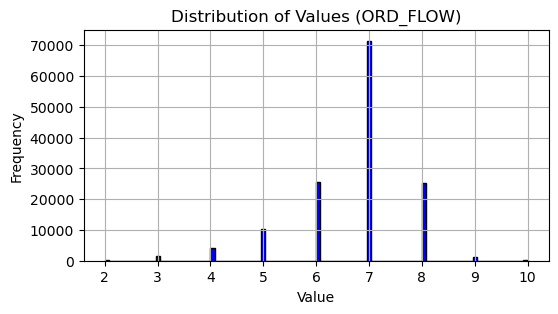

In [13]:
# Calculate statistics on the data array
median_value = Yenisey_HydroRIVERS['ORD_FLOW'].median()
min_value = Yenisey_HydroRIVERS['ORD_FLOW'].min()
max_value = Yenisey_HydroRIVERS['ORD_FLOW'].max()
print()
print(f'Mean: {median_value:.1f}')
print(f'Range: ({min_value} - {max_value})')
print()
# Plot
plt.figure(figsize=(6, 3))
plt.hist(Yenisey_HydroRIVERS['ORD_FLOW'], bins=100, color='blue', edgecolor='black') # bins=100, 
plt.title('Distribution of Values (ORD_FLOW)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)

##### ORD_FLOW
- The maximum ORD_FLOW value is 2, denoting a long-term average discharge ≥ 10,000 m3/s and < 100,000 m3/s

- The median ORD_FLOW value is 7, denoting long-term average discharge ≥ 0.1 m3/s and < 1 m3/s


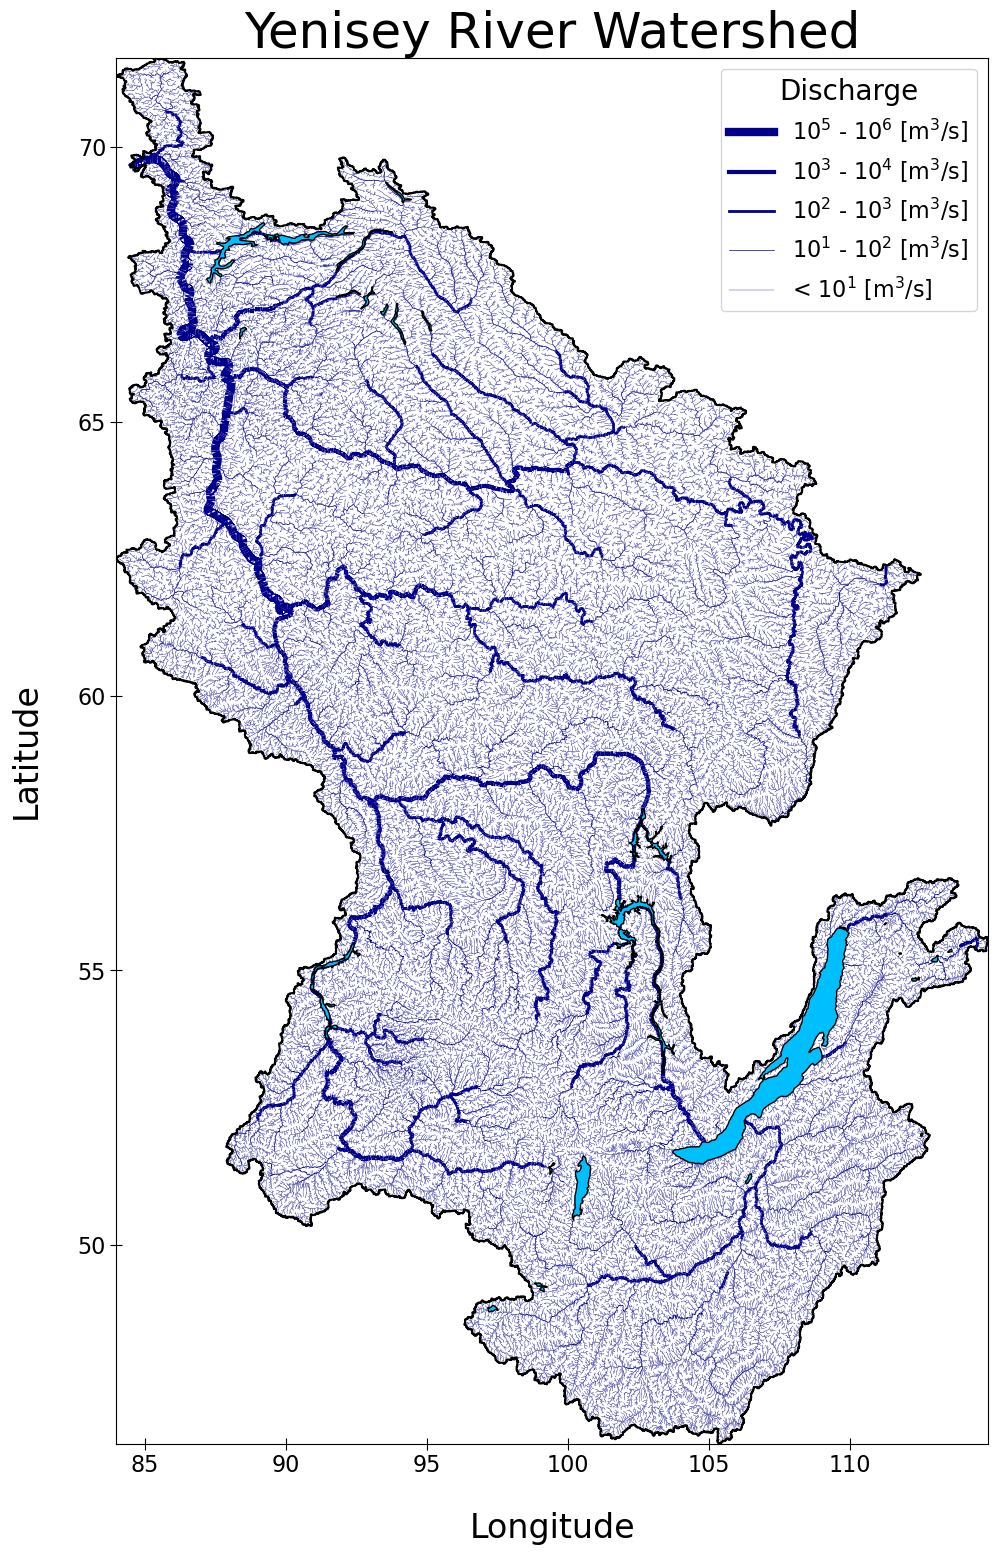

In [14]:
fig, ax = plt.subplots(figsize=(18, 18))

# Unique ORD_FLOW values
unique_ORD_FLOW = Yenisey_HydroRIVERS.ORD_FLOW.unique()

# Plot the Riverlines
for flow_order in unique_ORD_FLOW:

    # Create a subset for each flow order
    subset = Yenisey_HydroRIVERS[Yenisey_HydroRIVERS['ORD_FLOW'] == flow_order]

    # Define line width and z-order based on river order
    lw, z = (6, 6) if flow_order == 2 else \
            (3, 5) if flow_order == 3 else \
            (2, 4) if flow_order == 4 else \
            (0.5, 3) if flow_order == 5 else \
            (0.25, 2)

    # Plot the rivers
    subset.plot(ax=ax, color='darkblue', edgecolor='darkblue', lw=lw, zorder=z)

AGRO_Watershed.plot(ax=ax, color='none', edgecolor='black', lw=1.5, zorder=8)
gpd_lakes.plot(ax=ax, edgecolor='black', color='deepskyblue', zorder=8)
ax.set_title("Yenisey River Watershed", fontsize=36)
ax.set_xlabel('Longitude', color='black', fontsize=24, labelpad=25)
ax.set_ylabel('Latitude', color='black', fontsize=24, labelpad=25)
ax.xaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16)
ax.yaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16)

# Setting the plot limits
xmin, ymin, xmax, ymax = AGRO_Watershed.total_bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Define your discharge_labels dictionary
discharge_labels = {
    2: '10$^5$ - 10$^6$ [m$^3$/s]',
    3: '10$^3$ - 10$^4$ [m$^3$/s]',
    4: '10$^2$ - 10$^3$ [m$^3$/s]',
    5: '10$^1$ - 10$^2$ [m$^3$/s]',
    6: '< 10$^1$ [m$^3$/s]'
}

# Create legend handles
legend_handles = []
for flow_order in range(2, 7):
    lw = 6 if flow_order == 2 else 3 if flow_order == 3 else 2 if flow_order == 4 else 0.5 if flow_order == 5 else 0.25
    handle = Line2D([0], [0], color='darkblue', linewidth=lw)
    legend_handles.append(handle)

# Add a title to the legend with custom positioning
ax.legend(legend_handles, [discharge_labels[fo] for fo in range(2, 7)], 
          loc='upper right', title='Discharge', title_fontsize=20, 
          ncol=1, prop={'size': 16})  # , bbox_to_anchor=(1, 1.02)

# Save Plot
#fig.savefig('xxx_HydroRIVERS.png', dpi = 600, bbox_inches='tight')